<a href="https://colab.research.google.com/github/Sdolskin/learning-classes/blob/Trained_models/Autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD, Adam

print(tf.__version__)

2.12.0


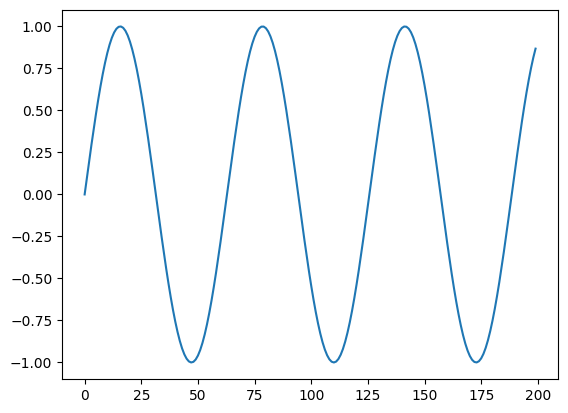

In [11]:
#make the ogiginal data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [12]:
### Build the dataset
#let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [13]:
### try autoregregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),

)

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 0s 68ms/step - loss: 0.4199 - val_loss: 0.2958
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.2029 - val_loss: 0.1126
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0927 - val_loss: 0.0189
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0479
Epoch 5/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0415 - val_loss: 0.0266
Epoch 6/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0357 - val_loss: 0.0470
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0377 - val_loss: 0.0271
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0263 - val_loss: 0.0182
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0107 - val_loss: 0.0058
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0059 - val_loss: 5.8811e-04
Epoch 11/80
3/3 [===================

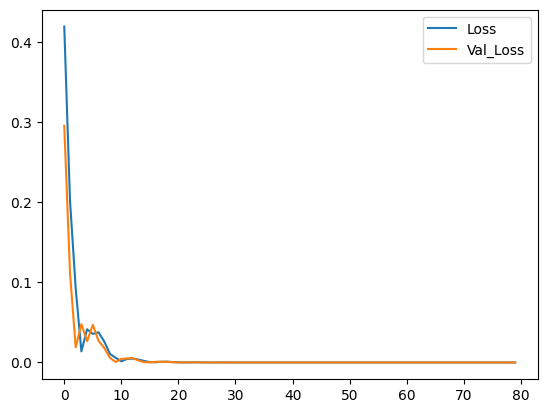

In [14]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

In [ ]:
# "wrong!!" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] #1x1 array -> scalar
  i += 1
  # update the predictions list
  validation_predictions.append(p)

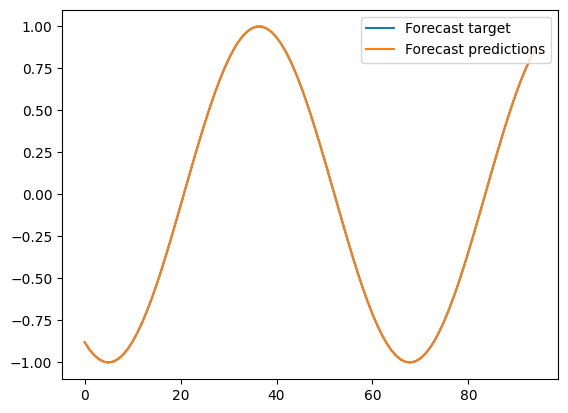

In [16]:
plt.plot(validation_target, label='Forecast target')
plt.plot(validation_predictions, label='Forecast predictions')
plt.legend()

In [ ]:
# Forecast Future Values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] # 1-D array of length 

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] #1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

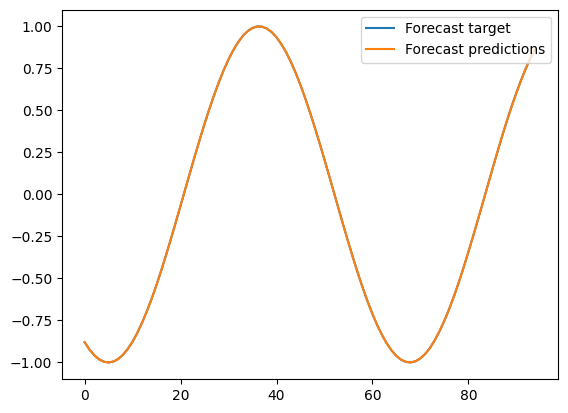

In [18]:
plt.plot(validation_target, label='Forecast target')
plt.plot(validation_predictions, label='Forecast predictions')
plt.legend()